In [1]:
import pandas as pd
import numpy as np

# Crear dataset de rendimiento estudiantil
np.random.seed(42)
n_estudiantes = 500

df = pd.DataFrame({
    'id_estudiante': range(1, n_estudiantes + 1),
    'edad': np.random.normal(16, 1.5, n_estudiantes).clip(14, 19).astype(int),
    'horas_estudio_semanal': np.random.normal(20, 8, n_estudiantes).clip(5, 50).astype(int),
    'promedio_calificaciones': np.random.normal(7.5, 1.2, n_estudiantes).clip(1, 10),
    'ingresos_familiares': np.random.lognormal(9, 0.6, n_estudiantes).round(0),
    'nivel_socioeconomico': np.random.choice(
        ['Bajo', 'Medio', 'Alto'], 
        n_estudiantes, 
        p=[0.3, 0.5, 0.2]
    ),
    'asistencia_clases': np.random.normal(85, 15, n_estudiantes).clip(10, 100).astype(int),
    'horas_extracurriculares': np.random.normal(8, 4, n_estudiantes).clip(0, 20).astype(int),
    'satisfaccion_vida': np.random.normal(7.2, 1.5, n_estudiantes).clip(1, 10),
    'nivel_estres': np.random.normal(6.8, 1.8, n_estudiantes).clip(1, 10)
})

# Convertir variable categórica a numérica
nivel_map = {'Bajo': 1, 'Medio': 2, 'Alto': 3}
df['nivel_socioeconomico_num'] = df['nivel_socioeconomico'].map(nivel_map)

print(f"Dataset creado: {len(df)} estudiantes")
print(f"Variables numéricas: {len(df.select_dtypes(include=[np.number]).columns)}")

Dataset creado: 500 estudiantes
Variables numéricas: 10


In [2]:
df.head()

,id_estudiante,edad,horas_estudio_semanal,promedio_calificaciones,ingresos_familiares,nivel_socioeconomico,asistencia_clases,horas_extracurriculares,satisfaccion_vida,nivel_estres,nivel_socioeconomico_num
0,1,16,27,9.179227,12926.0,Medio,62,11,7.089041,5.360107,2
1,2,15,35,8.609560,5821.0,Bajo,75,8,7.086502,3.365596,1
2,3,16,8,7.571556,4960.0,Medio,83,10,10.000000,6.092505,2
3,4,18,24,6.723676,8087.0,Bajo,63,20,5.121018,8.602937,1
4,5,15,14,8.337868,7317.0,Alto,71,0,7.958384,9.308218,3


In [3]:
# Correlaciones con promedio de calificaciones
correlaciones_calificaciones = (
    df.corr(numeric_only=True)['promedio_calificaciones']
    .sort_values(ascending=False)
)

print("CORRELACIONES CON PROMEDIO DE CALIFICACIONES")
print("=" * 50)

for var, corr in correlaciones_calificaciones.items():
    if var != 'promedio_calificaciones':
        intensidad = (
            "Fuerte" if abs(corr) >= 0.6 else
            "Moderada" if abs(corr) >= 0.3 else
            "Débil"
        )
        direccion = "positiva" if corr > 0 else "negativa"
        print(f"{var:30} | {corr:+.3f} | {intensidad} {direccion}")

CORRELACIONES CON PROMEDIO DE CALIFICACIONES
horas_estudio_semanal          | +0.076 | Débil positiva
nivel_socioeconomico_num       | +0.060 | Débil positiva
satisfaccion_vida              | +0.009 | Débil positiva
id_estudiante                  | -0.000 | Débil negativa
nivel_estres                   | -0.014 | Débil negativa
asistencia_clases              | -0.031 | Débil negativa
ingresos_familiares            | -0.034 | Débil negativa
horas_extracurriculares        | -0.038 | Débil negativa
edad                           | -0.065 | Débil negativa


In [4]:
# ===============================
# MATRIZ DE CORRELACIÓN COMPLETA
# ===============================

variables_interes = [
    'edad',
    'horas_estudio_semanal',
    'promedio_calificaciones',
    'ingresos_familiares',
    'asistencia_clases',
    'horas_extracurriculares',
    'satisfaccion_vida',
    'nivel_estres',
    'nivel_socioeconomico_num'
]

correlation_matrix = df[variables_interes].corr()

print("MATRIZ DE CORRELACIÓN (valores |r| > 0.3)")
print("=" * 45)

# Mostrar solo correlaciones relevantes
strong_correlations = correlation_matrix.where(abs(correlation_matrix) > 0.3)
print(strong_correlations.round(3))

MATRIZ DE CORRELACIÓN (valores |r| > 0.3)
                          edad  horas_estudio_semanal  \
edad                       1.0                    NaN   
horas_estudio_semanal      NaN                    1.0   
promedio_calificaciones    NaN                    NaN   
ingresos_familiares        NaN                    NaN   
asistencia_clases          NaN                    NaN   
horas_extracurriculares    NaN                    NaN   
satisfaccion_vida          NaN                    NaN   
nivel_estres               NaN                    NaN   
nivel_socioeconomico_num   NaN                    NaN   

                          promedio_calificaciones  ingresos_familiares  \
edad                                          NaN                  NaN   
horas_estudio_semanal                         NaN                  NaN   
promedio_calificaciones                       1.0                  NaN   
ingresos_familiares                           NaN                  1.0   
asistencia_clases

In [5]:
# ==================================
# TOP 10 CORRELACIONES MÁS FUERTES
# ==================================

corr_unstack = correlation_matrix.unstack()

# Eliminar autocorrelaciones
corr_unstack = corr_unstack[
    corr_unstack.index.get_level_values(0) != 
    corr_unstack.index.get_level_values(1)
]

top_correlations = corr_unstack.abs().sort_values(ascending=False).head(10)

print("TOP 10 CORRELACIONES MÁS FUERTES")
print("=" * 40)

for (var1, var2), corr_abs in top_correlations.items():
    if var1 < var2:  # evitar duplicados
        corr_real = correlation_matrix.loc[var1, var2]
        print(f"{var1:22} ↔ {var2:22} | {corr_real:+.3f}")

TOP 10 CORRELACIONES MÁS FUERTES
asistencia_clases      ↔ horas_extracurriculares | -0.117
horas_estudio_semanal  ↔ satisfaccion_vida      | -0.103
edad                   ↔ horas_estudio_semanal  | -0.093
asistencia_clases      ↔ horas_estudio_semanal  | -0.087
horas_estudio_semanal  ↔ nivel_estres           | -0.079


In [6]:
# Identificar clusters de variables relacionadas
print("\nANÁLISIS DE GRUPOS CORRELACIONADOS")
print("=" * 40)

# Variables relacionadas con rendimiento académico
academic_vars = ['horas_estudio_semanal', 'asistencia_clases', 'promedio_calificaciones']
academic_corr = df[academic_vars].corr()
print("Variables académicas:")
print(academic_corr.round(3))

# Variables relacionadas con bienestar
wellbeing_vars = ['satisfaccion_vida', 'nivel_estres', 'horas_extracurriculares']
wellbeing_corr = df[wellbeing_vars].corr()
print("\nVariables de bienestar:")
print(wellbeing_corr.round(3))

# Variables socioeconómicas
socio_vars = ['ingresos_familiares', 'nivel_socioeconomico_num', 'promedio_calificaciones']
socio_corr = df[socio_vars].corr()
print("\nVariables socioeconómicas:")
print(socio_corr.round(3))


ANÁLISIS DE GRUPOS CORRELACIONADOS
Variables académicas:
                         horas_estudio_semanal  asistencia_clases  \
horas_estudio_semanal                    1.000             -0.087   
asistencia_clases                       -0.087              1.000   
promedio_calificaciones                  0.076             -0.031   

                         promedio_calificaciones  
horas_estudio_semanal                      0.076  
asistencia_clases                         -0.031  
promedio_calificaciones                    1.000  

Variables de bienestar:
                         satisfaccion_vida  nivel_estres  \
satisfaccion_vida                    1.000         0.072   
nivel_estres                         0.072         1.000   
horas_extracurriculares             -0.033        -0.011   

                         horas_extracurriculares  
satisfaccion_vida                         -0.033  
nivel_estres                              -0.011  
horas_extracurriculares                   

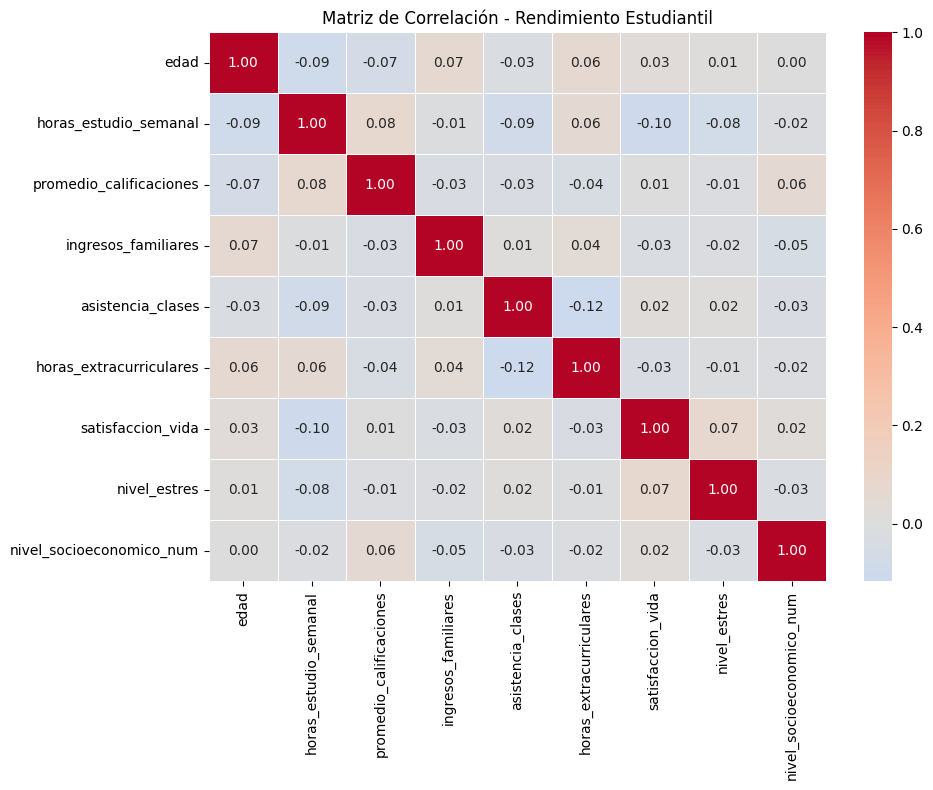

Mapa de calor guardado como 'matriz_correlacion_estudiantil.png'


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))

sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    linewidths=0.5
)

plt.title('Matriz de Correlación - Rendimiento Estudiantil')
plt.tight_layout()
plt.savefig('matriz_correlacion_estudiantil.png', dpi=100, bbox_inches='tight')
plt.show()

print("Mapa de calor guardado como 'matriz_correlacion_estudiantil.png'")

In [8]:
# ===============================
# EXPORTAR EVIDENCIA DÍA 4 A EXCEL
# ===============================

# 1. Correlaciones con promedio de calificaciones
corr_calificaciones = df.corr()[['promedio_calificaciones']].sort_values(
    by='promedio_calificaciones', ascending=False
)

# 2. Matriz de correlación completa
matriz_correlacion = correlation_matrix.round(3)

# 3. Top correlaciones más fuertes
corr_unstack = correlation_matrix.unstack()
corr_unstack = corr_unstack[corr_unstack.index.get_level_values(0) != corr_unstack.index.get_level_values(1)]
top_corr = corr_unstack.abs().sort_values(ascending=False).head(10)

top_correlaciones = pd.DataFrame({
    'Variable 1': [i[0] for i in top_corr.index],
    'Variable 2': [i[1] for i in top_corr.index],
    'Correlación': [correlation_matrix.loc[i[0], i[1]] for i in top_corr.index]
})

# 4. Grupos de variables correlacionadas
corr_academicas = df[academic_vars].corr().round(3)
corr_bienestar = df[wellbeing_vars].corr().round(3)
corr_socioeconomicas = df[socio_vars].corr().round(3)

# ===============================
# ESCRIBIR ARCHIVO EXCEL
# ===============================

with pd.ExcelWriter(
    'Evidencia_Dia4_Analisis_Correlaciones.xlsx',
    engine='openpyxl'
) as writer:
    
    df.to_excel(writer, sheet_name='dataset_estudiantes', index=False)
    corr_calificaciones.to_excel(writer, sheet_name='corr_calificaciones')
    matriz_correlacion.to_excel(writer, sheet_name='matriz_correlacion')
    top_correlaciones.to_excel(writer, sheet_name='top_correlaciones', index=False)
    corr_academicas.to_excel(writer, sheet_name='corr_academicas')
    corr_bienestar.to_excel(writer, sheet_name='corr_bienestar')
    corr_socioeconomicas.to_excel(writer, sheet_name='corr_socioeconomicas')

print("Archivo 'Evidencia_Dia4_Analisis_Correlaciones.xlsx' generado correctamente")

ValueError: could not convert string to float: 'Medio'

In [9]:
# ===============================
# EXPORTAR EVIDENCIA DÍA 4 A EXCEL (CORREGIDO)
# ===============================

# Usar SOLO variables numéricas de interés
df_num = df[variables_interes]

# 1. Correlaciones con promedio de calificaciones
corr_calificaciones = df_num.corr()[['promedio_calificaciones']] \
    .sort_values(by='promedio_calificaciones', ascending=False)

# 2. Matriz de correlación completa
matriz_correlacion = df_num.corr().round(3)

# 3. Top correlaciones más fuertes
corr_unstack = matriz_correlacion.unstack()
corr_unstack = corr_unstack[
    corr_unstack.index.get_level_values(0) != corr_unstack.index.get_level_values(1)
]

top_corr = corr_unstack.abs().sort_values(ascending=False).head(10)

top_correlaciones = pd.DataFrame({
    'Variable 1': [i[0] for i in top_corr.index],
    'Variable 2': [i[1] for i in top_corr.index],
    'Correlación': [matriz_correlacion.loc[i[0], i[1]] for i in top_corr.index]
})

# 4. Grupos de variables correlacionadas
corr_academicas = df[academic_vars].corr().round(3)
corr_bienestar = df[wellbeing_vars].corr().round(3)
corr_socioeconomicas = df[socio_vars].corr().round(3)

# ===============================
# EXPORTAR A EXCEL (openpyxl)
# ===============================

with pd.ExcelWriter(
    'Evidencia_Dia4_Analisis_Correlaciones.xlsx',
    engine='openpyxl'
) as writer:

    df.to_excel(writer, sheet_name='dataset_estudiantes', index=False)
    corr_calificaciones.to_excel(writer, sheet_name='corr_calificaciones')
    matriz_correlacion.to_excel(writer, sheet_name='matriz_correlacion')
    top_correlaciones.to_excel(writer, sheet_name='top_correlaciones', index=False)
    corr_academicas.to_excel(writer, sheet_name='corr_academicas')
    corr_bienestar.to_excel(writer, sheet_name='corr_bienestar')
    corr_socioeconomicas.to_excel(writer, sheet_name='corr_socioeconomicas')

print("✅ Evidencia_Dia4_Analisis_Correlaciones.xlsx generado correctamente")

✅ Evidencia_Dia4_Analisis_Correlaciones.xlsx generado correctamente


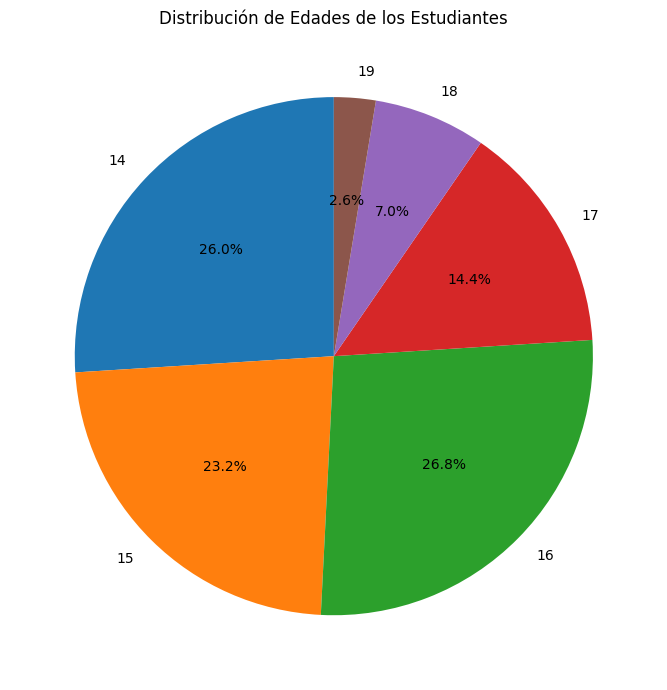

In [10]:
import matplotlib.pyplot as plt

# Conteo de edades
edad_counts = df['edad'].value_counts().sort_index()

plt.figure(figsize=(7, 7))
plt.pie(
    edad_counts,
    labels=edad_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Distribución de Edades de los Estudiantes')
plt.tight_layout()
plt.savefig('distribucion_edades_estudiantes.png', dpi=100)
plt.show()

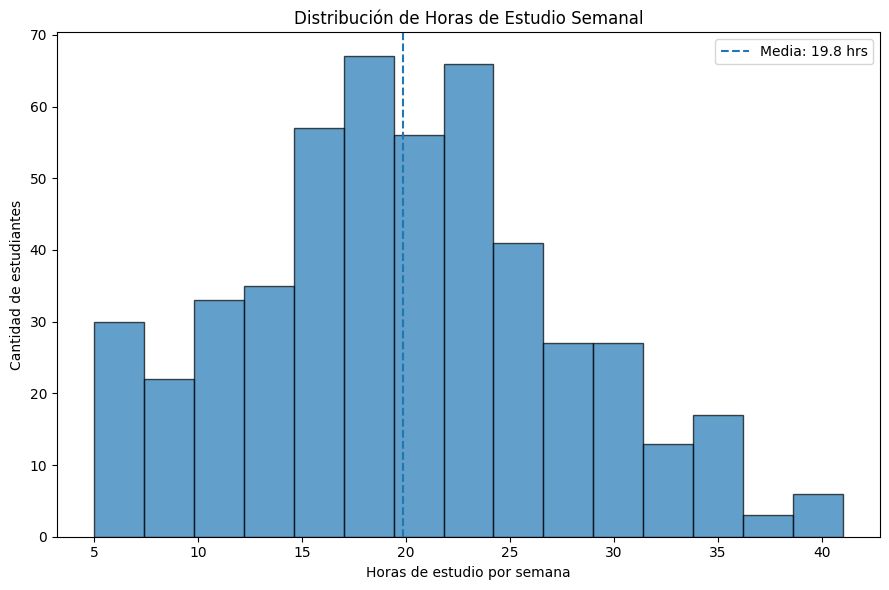

In [11]:
plt.figure(figsize=(9, 6))
plt.hist(df['horas_estudio_semanal'], bins=15, edgecolor='black', alpha=0.7)
plt.axvline(
    df['horas_estudio_semanal'].mean(),
    linestyle='--',
    label=f"Media: {df['horas_estudio_semanal'].mean():.1f} hrs"
)

plt.title('Distribución de Horas de Estudio Semanal')
plt.xlabel('Horas de estudio por semana')
plt.ylabel('Cantidad de estudiantes')
plt.legend()
plt.tight_layout()
plt.savefig('distribucion_horas_estudio.png', dpi=100)
plt.show()

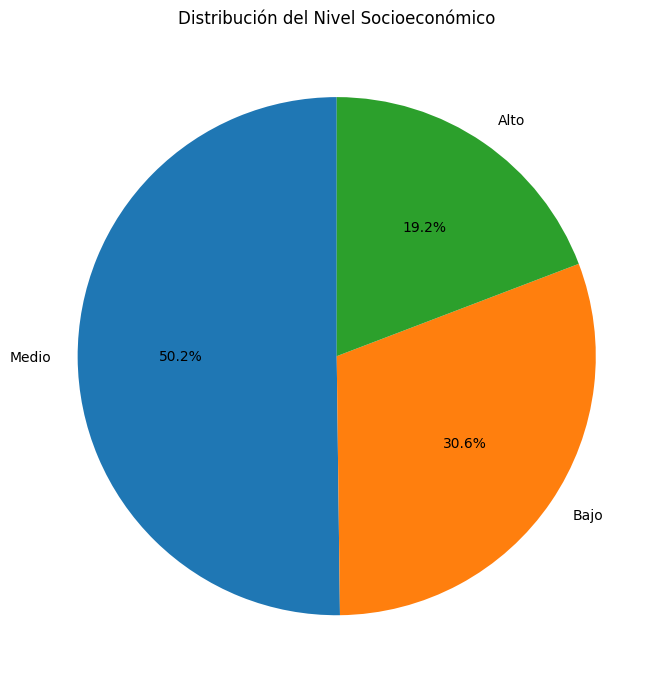

In [12]:
nivel_counts = df['nivel_socioeconomico'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(
    nivel_counts,
    labels=nivel_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Distribución del Nivel Socioeconómico')
plt.tight_layout()
plt.savefig('distribucion_nivel_socioeconomico.png', dpi=100)
plt.show()